author: okryzhan vprypesh

In [1]:
import numpy as np

In [2]:
np.random.rand(5, 5)

array([[0.13926641, 0.81489776, 0.94602555, 0.73121205, 0.85123056],
       [0.26454665, 0.09255896, 0.44147342, 0.30067543, 0.42463939],
       [0.41222877, 0.37489396, 0.27247519, 0.37234271, 0.31636004],
       [0.80693928, 0.03011817, 0.54663206, 0.9675648 , 0.13536798],
       [0.51024258, 0.37748572, 0.70557535, 0.68318905, 0.17185147]])

In [3]:
a = np.arange(12)
a.reshape(4, 3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [4]:
def incr_arr(n):
        return np.linspace(0, 1, n).reshape(1, n)

incr_arr(5).shape                         

(1, 5)

In [5]:
z = np.random.rand(10, 12)
print(z)
z1 = z[0:5, 8:]
print(z1)

[[0.23862522 0.68242119 0.22516227 0.78892805 0.78111787 0.20890369
  0.68429531 0.87638797 0.13635498 0.63936084 0.38706896 0.83433848]
 [0.53931684 0.54177118 0.00886278 0.62198169 0.70570921 0.28944668
  0.17257251 0.79669016 0.78896293 0.03516761 0.15546828 0.04202192]
 [0.60469259 0.86723529 0.22986266 0.92938362 0.83301779 0.03518721
  0.07586182 0.08545852 0.54180455 0.79288995 0.82187536 0.36224968]
 [0.94264112 0.08314278 0.88138819 0.78374586 0.41924212 0.17306784
  0.01516923 0.88072195 0.5441158  0.51178107 0.86072253 0.65798857]
 [0.18371305 0.90625753 0.34636916 0.77979705 0.21682785 0.85289974
  0.67260566 0.82174438 0.97920827 0.57002724 0.68446727 0.70037163]
 [0.8884822  0.42318001 0.12772504 0.5684292  0.51056792 0.86838369
  0.23826953 0.14307364 0.03387753 0.93264825 0.08250254 0.27523837]
 [0.66120807 0.92163366 0.79862909 0.79602882 0.35891056 0.89707074
  0.28628027 0.44678446 0.84869994 0.98716997 0.26034971 0.32312013]
 [0.75299159 0.01584648 0.28994912 0.7142

In [6]:
import matplotlib.pylab as mp

(20, 100)


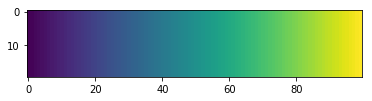

In [7]:
n, m = 100, 20
res = incr_arr(n)
for i in range(1, m):
    res = np.concatenate((res, incr_arr(n)), axis=0)
mp.imshow(res)
print(res.shape)

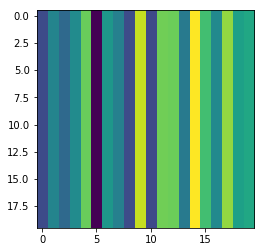

In [102]:
def rand_arr(n):
    return np.random.rand(n).reshape(1, n)

matrix = rand_arr(m)
for i in range(1, n):
    matrix = np.concatenate((matrix, rand_arr(m)), axis=0)
mult = res @ matrix
mp.imshow(mult)

(530, 800, 4)


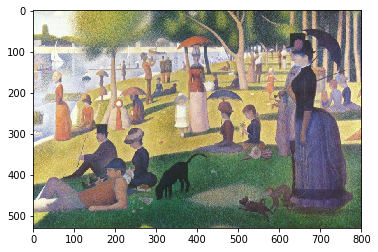

In [104]:
img = mp.imread('img.png')
mp.imshow(img)
print(img.shape)